# Wrangle a SWOT PNG file

## Install these packages:

### https://remote-sensing.readthedocs.io/en/latest/

### https://wrangler.readthedocs.io/en/latest/

In [4]:
# imports
from importlib import reload

import glob
import numpy as np
import pandas
import os

import h5py
import xarray
from pyproj import Geod

from matplotlib import pyplot as plt
import matplotlib.image as mpimg



# Grab an image

In [3]:
path = '/home/xavier/Projects/Oceanography/data/NASA_oceanai/SWOT'
files = glob.glob(os.path.join(path, 'Pass_003', 'ssr_*.png'))
tfile = files[0]
tfile

'/home/xavier/Projects/Oceanography/data/NASA_oceanai/SWOT/Pass_003/ssr_502_003_20539_L.png'

In [13]:
len(files)

7986

# Plot it

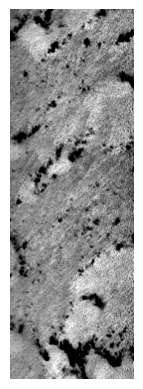

In [5]:
# Load the image
img = mpimg.imread(tfile)

# Display the image
plt.imshow(img)
plt.axis('off')  # Turn off axis numbers and ticks
plt.show()

In [7]:
img.shape

(660, 220, 3)

# Chop it up

In [8]:
npix = 55

In [12]:
sub_imgs = []
for irow in range(img.shape[0]//npix):
    for jcol in range(img.shape[1]//npix):
        sub_imgs.append(img[irow*npix:(irow+1)*npix, jcol*npix:(jcol+1)*npix, 0])
# Concatenate
sub_imgs = np.array(sub_imgs)
sub_imgs.shape

(48, 55, 55)

In [14]:
8000*50

400000

In [15]:
img.dtype

dtype('float32')

In [16]:
sub_imgs.dtype

dtype('float32')

In [17]:
sub_imgs[0]

array([[0.42352942, 0.38039216, 0.34901962, ..., 0.45882353, 0.41568628,
        0.47058824],
       [0.3019608 , 0.31764707, 0.2901961 , ..., 0.46666667, 0.34901962,
        0.3764706 ],
       [0.27058825, 0.29411766, 0.31764707, ..., 0.43137255, 0.2784314 ,
        0.21568628],
       ...,
       [0.        , 0.        , 0.        , ..., 0.88235295, 0.79607844,
        0.827451  ],
       [0.        , 0.        , 0.        , ..., 0.78039217, 0.7529412 ,
        0.78431374],
       [0.        , 0.        , 0.        , ..., 0.75686276, 0.74509805,
        0.7529412 ]], dtype=float32)

In [18]:
sub_imgs[1]

array([[0.53333336, 0.57254905, 0.5647059 , ..., 0.64705884, 0.6431373 ,
        0.46666667],
       [0.50980395, 0.5372549 , 0.61960787, ..., 0.63529414, 0.67058825,
        0.6509804 ],
       [0.2627451 , 0.41568628, 0.5803922 , ..., 0.7647059 , 0.80784315,
        0.7647059 ],
       ...,
       [0.85490197, 0.9019608 , 0.7607843 , ..., 0.36862746, 0.34509805,
        0.50980395],
       [0.89411765, 0.85882354, 0.7176471 , ..., 0.34901962, 0.43137255,
        0.52156866],
       [0.7764706 , 0.7607843 , 0.78431374, ..., 0.39215687, 0.48235294,
        0.58431375]], dtype=float32)

----

# Load up an example h5

In [23]:
h5file = os.path.join(path, 'Pass_003.h5')
f = h5py.File(h5file, 'r')
list(f.keys())

['imgs']

In [24]:
f['imgs'].shape

(144, 55, 55)

In [25]:
f.close()